## read me

In [27]:
%matplotlib qt

import mne
import glob
import os
mne.set_log_level('ERROR')

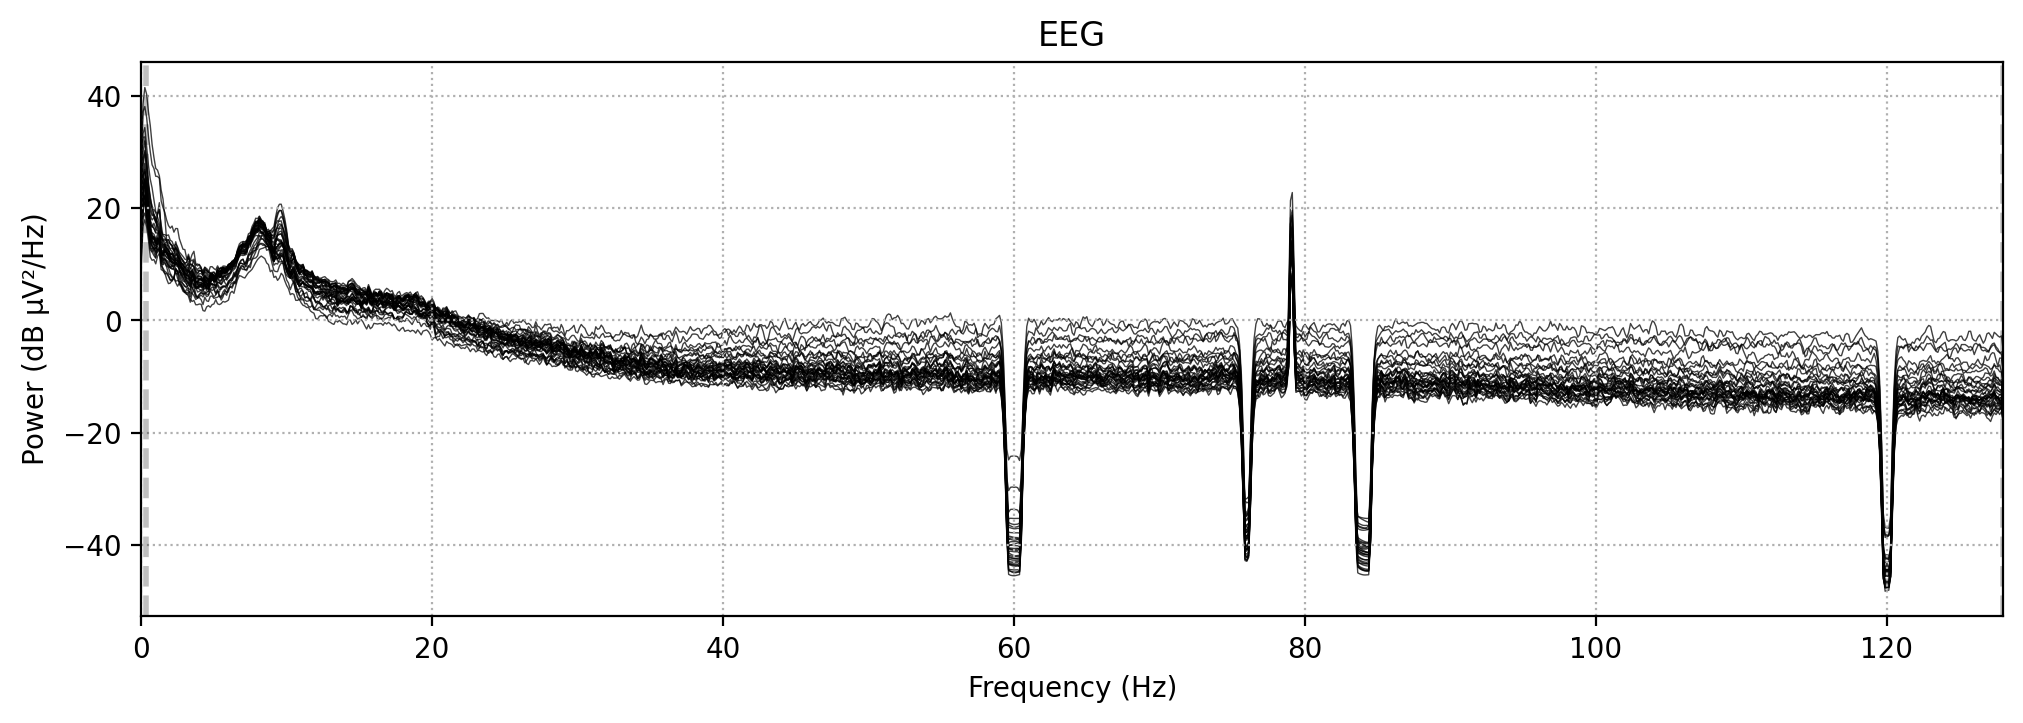

In [187]:
count = 15

paths = glob.glob('../../data/mne_raw_events/sub*-day?-*_mmn-raw_phot-events.fif')
export_folder = 'mmn/'
paths.sort()
path = paths[count]
basename = os.path.basename(path)

raw = mne.io.read_raw(path, preload=True)

raw.filter(0.3, None)
raw.notch_filter(freqs=[60, 76, 84, 120])
raw.notch_filter(freqs=60, notch_widths=1, phase='zero')
raw.notch_filter(freqs=84, notch_widths=1, phase='zero')    
raw.plot_psd()

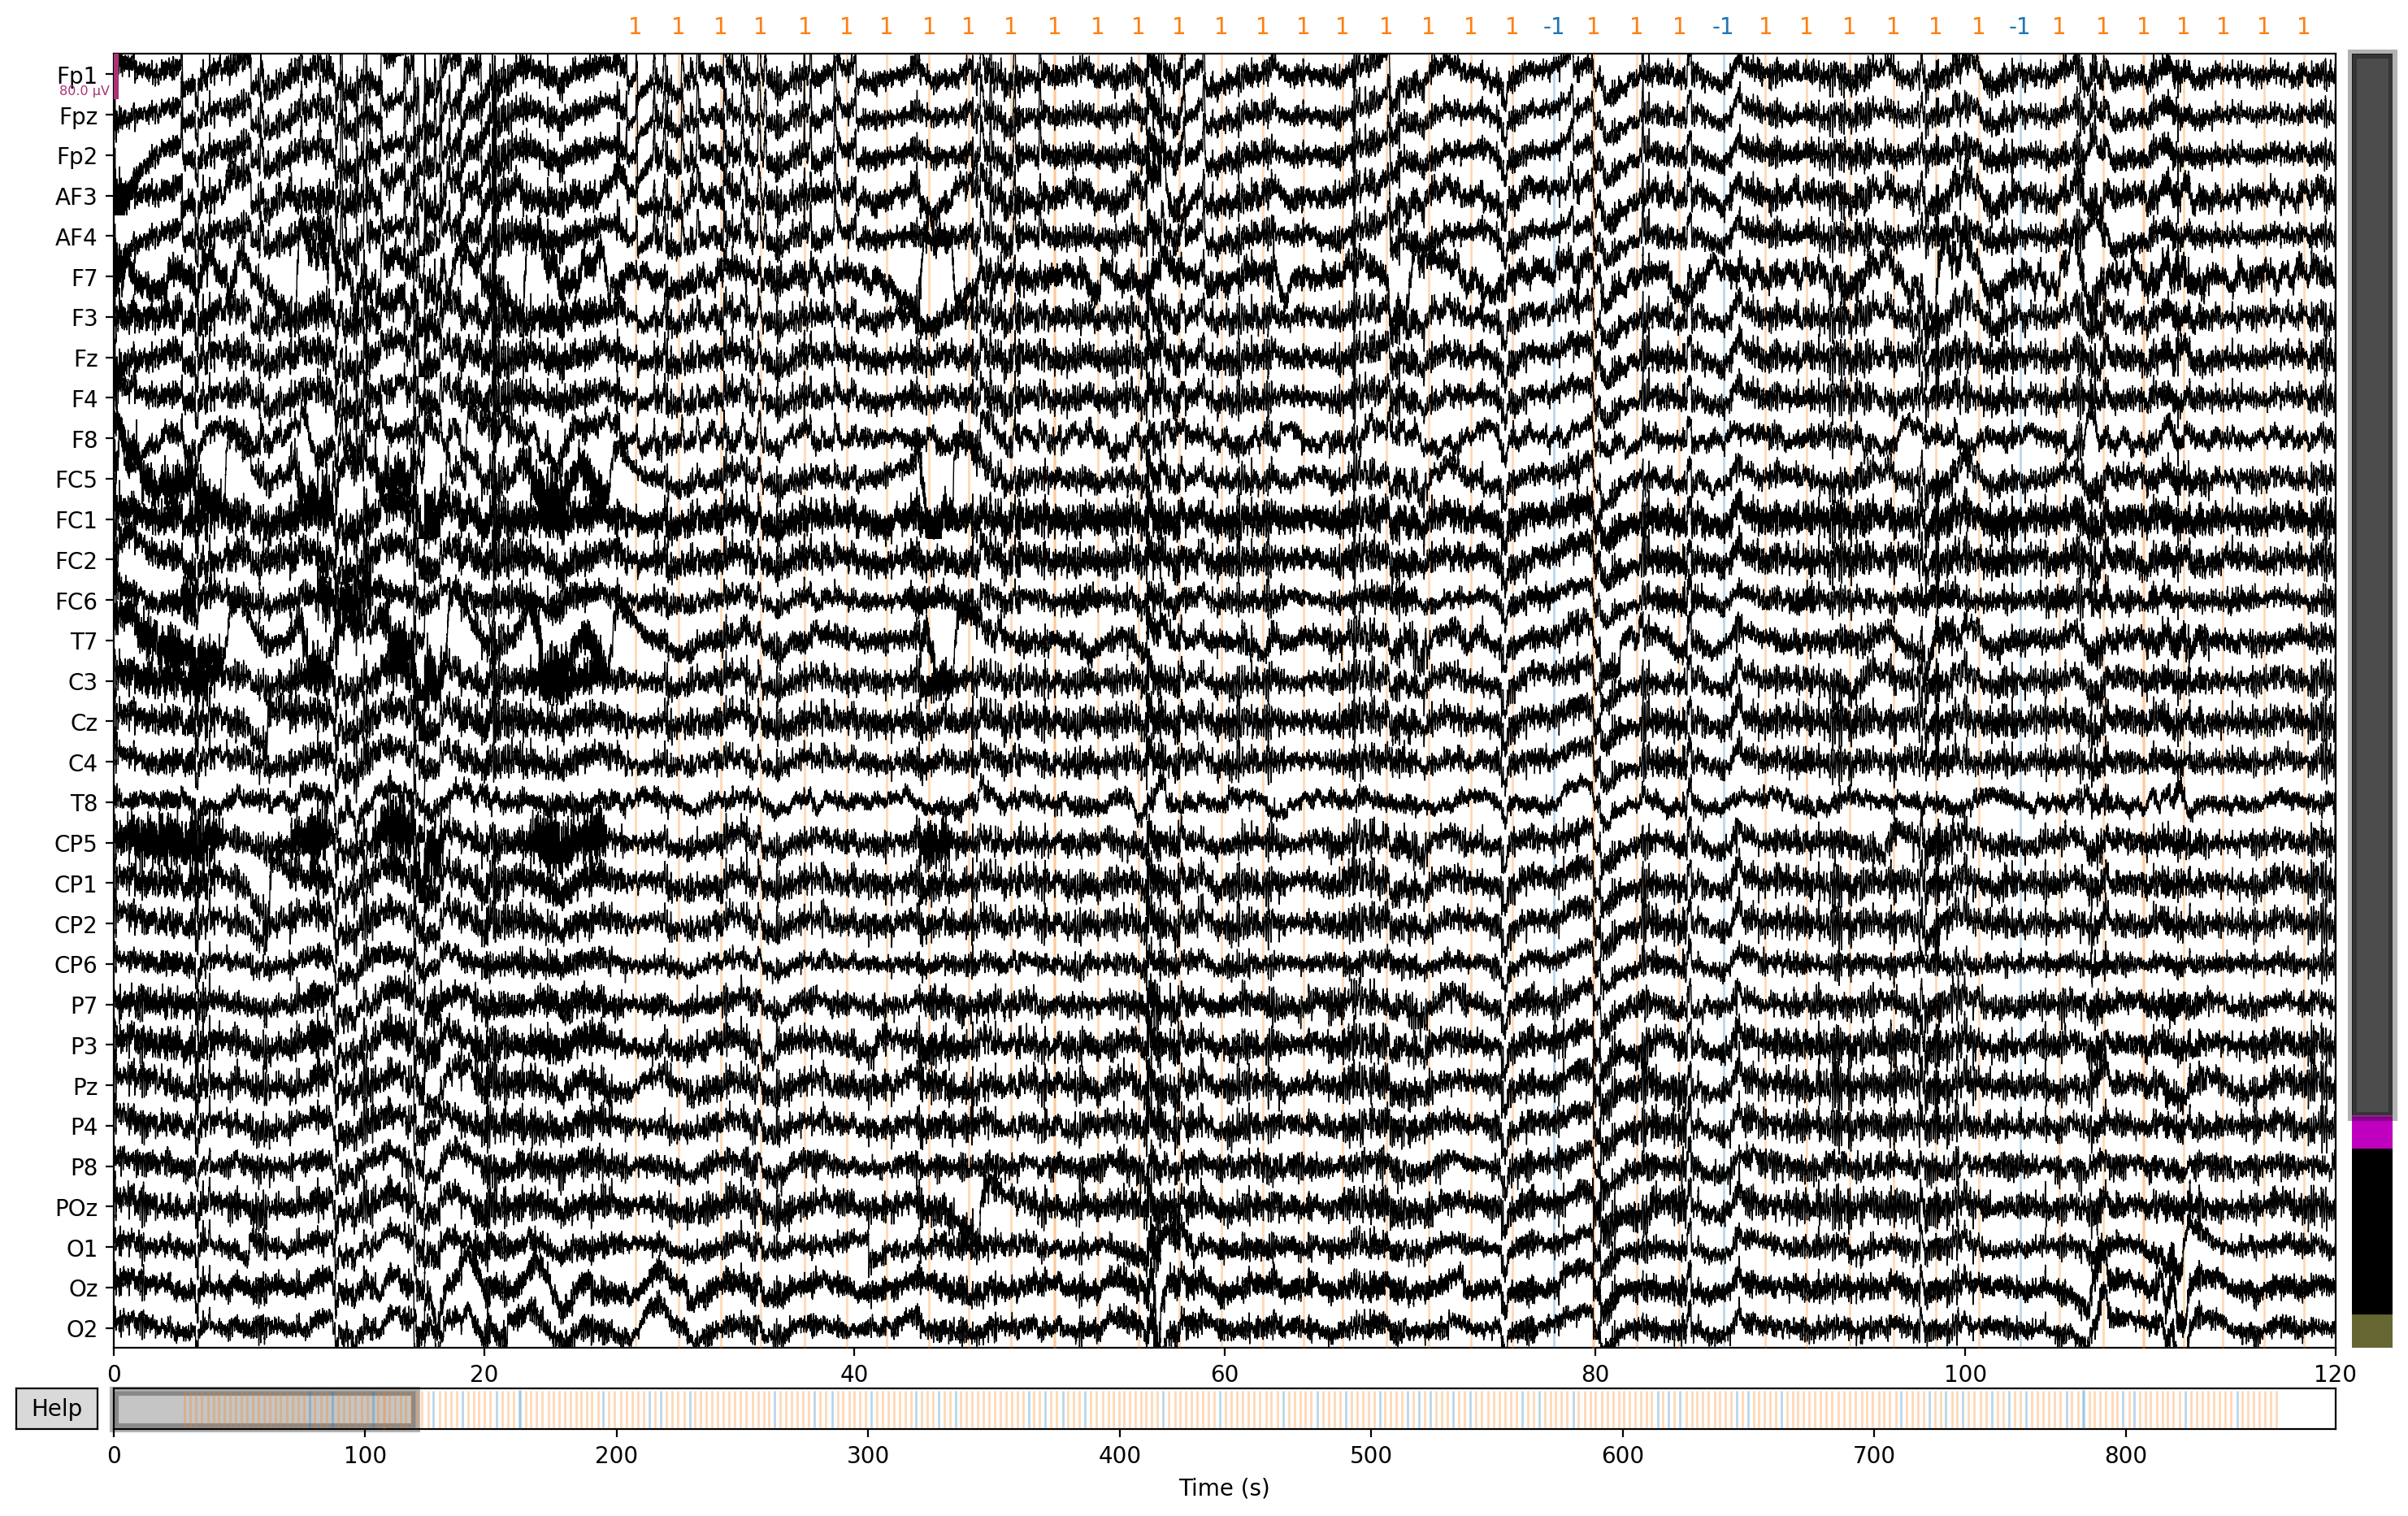

In [188]:
scalings = {'eeg': 40e-6}
raw.plot(scalings=scalings, n_channels=32, duration=120, highpass=None, lowpass=None)

In [189]:
raw.notch_filter(freqs=79, notch_widths=1, phase='zero')

<Raw | sub1-day4-mindfulness_mmn-raw_phot-events.fif, 39 x 226160 (883.4 s), ~67.3 MB, data loaded>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mne/time_frequency/psd.py:266: UserWarning: nperseg = 2048 is greater than input length  = 517, using nperseg = 517
  return _func(*args, **kwargs)


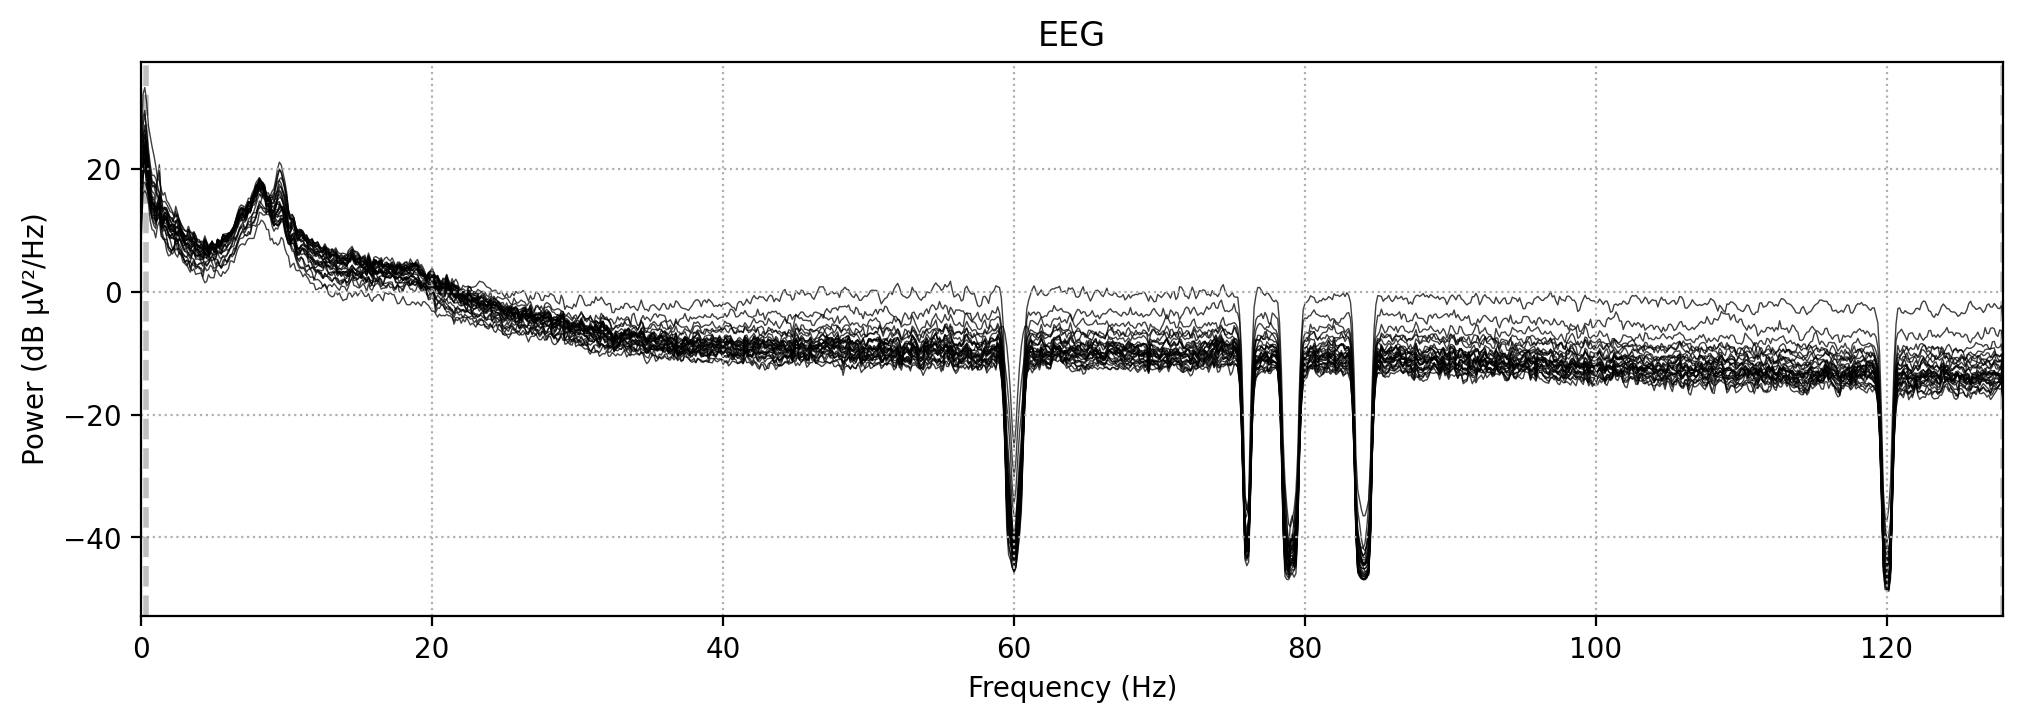

In [190]:
raw.plot_psd()

In [191]:
raw.save(export_folder + basename, overwrite=True)